<a href="https://colab.research.google.com/github/coppermilk/colab/blob/main/Andrey_Sozykin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Представление текста в цифровом виде для нейросети 

# Анализ тональности отзывов на фильмы IMDB | Нейросети для анализа текстов

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [39]:
max_words = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [ ]:
x_train[3]

In [5]:
y_train[3]

1

In [ ]:
word_index = imdb.get_word_index()
word_index

In [8]:
reverse_word_index = dict()
for key, value in word_index.items():
  reverse_word_index[value] = key

In [ ]:
for i in range(1, 21):
  print(i, '->',reverse_word_index[i])

In [40]:
index = 3
message = ""

for code in x_train[index]:
  word = reverse_word_index.get(code - 3, '?')
  message += word + ' '
message

"? the scots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional reservoir fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfathe

In [41]:
maxlen = 200

x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [42]:
x_train[3]

array([    4,   341,     7,    27,   846,    10,    10,    29,     9,
        1906,     8,    97,     6,   236, 11120,  1311,     8,     4,
           2,     7,    31,     7,     2,    91,     2,  3987,    70,
           4,   882,    30,   579,    42,     9,    12,    32,    11,
         537,    10,    10,    11,    14,    65,    44,   537,    75,
       11876,  1775,  3353, 12716,  1846,     4, 11286,     7,   154,
           5,     4,   518,    53, 13243, 11286,     7,  3211,   882,
          11,   399,    38,    75,   257,  3807,    19, 18223,    17,
          29,   456,     4,    65,     7,    27,   205,   113,    10,
          10,     2,     4,     2, 10359,     9,   242,     4,    91,
        1202, 11377,     5,  2070,   307,    22,     7,  5168,   126,
          93,    40, 18223,    13,   188,  1076,  3222,    19,     4,
       13465,     7,  2348,   537,    23,    53,   537,    21,    82,
          40, 18223,    13,     2,    14,   280,    13,   219,     4,
           2,   431,

In [51]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(maxlen,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [52]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.4990 - val_loss: nan - val_accuracy: 0.5124
Epoch 2/25
176/176 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 3/25
176/176 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 4/25
176/176 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 5/25
176/176 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 6/25
176/176 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 7/25
176/176 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 8/25
176/176 [============================

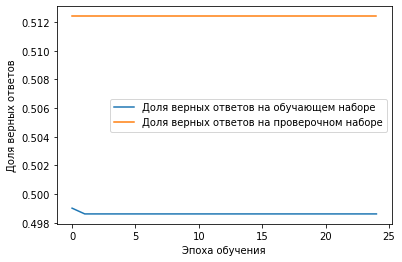

In [53]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [32]:
scoref = model.evaluate(x_test, y_test, verbose = 1)

782/782 [==============================] - 1s 2ms/step - loss: 2.0976 - accuracy: 0.5084


In [35]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scoref[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 50.836


# Представление текста вектором One Hot Encoding

In [64]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [65]:
max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [66]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [87]:
x_train[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

In [60]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [68]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 5s 30ms/step - loss: 0.3364 - accuracy: 0.8571 - val_loss: 0.2670 - val_accuracy: 0.8944
Epoch 2/25
176/176 [==============================] - 5s 29ms/step - loss: 0.1565 - accuracy: 0.9414 - val_loss: 0.3017 - val_accuracy: 0.8892
Epoch 3/25
176/176 [==============================] - 5s 29ms/step - loss: 0.0925 - accuracy: 0.9681 - val_loss: 0.3786 - val_accuracy: 0.8844
Epoch 4/25
176/176 [==============================] - 5s 29ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.4889 - val_accuracy: 0.8792
Epoch 5/25
176/176 [==============================] - 5s 28ms/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.5717 - val_accuracy: 0.8812
Epoch 6/25
176/176 [==============================] - 5s 28ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.7079 - val_accuracy: 0.8820
Epoch 7/25
176/176 [==============================] - 5s 28ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.8142 - val_accuracy: 0.8804

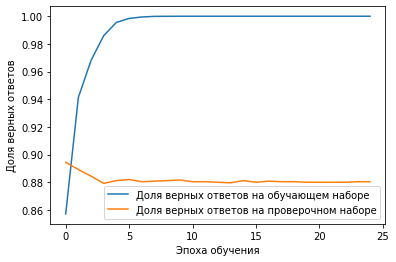

In [69]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Представление текста плотным вектором

In [70]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [71]:
max_words=10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [88]:
x_train[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

## Подготовка данных для обучения

In [72]:
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [89]:
model = Sequential()
model.add(Embedding(max_words, 4, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [90]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 2s 8ms/step - loss: 0.6844 - accuracy: 0.5736 - val_loss: 0.6505 - val_accuracy: 0.7128
Epoch 2/15
176/176 [==============================] - 1s 7ms/step - loss: 0.5405 - accuracy: 0.7836 - val_loss: 0.4404 - val_accuracy: 0.8360
Epoch 3/15
176/176 [==============================] - 1s 7ms/step - loss: 0.3687 - accuracy: 0.8657 - val_loss: 0.3507 - val_accuracy: 0.8616
Epoch 4/15
176/176 [==============================] - 1s 8ms/step - loss: 0.2914 - accuracy: 0.8925 - val_loss: 0.3148 - val_accuracy: 0.8700
Epoch 5/15
176/176 [==============================] - 1s 8ms/step - loss: 0.2501 - accuracy: 0.9088 - val_loss: 0.3001 - val_accuracy: 0.8768
Epoch 6/15
176/176 [==============================] - 1s 8ms/step - loss: 0.2216 - accuracy: 0.9197 - val_loss: 0.2904 - val_accuracy: 0.8828
Epoch 7/15
176/176 [==============================] - 2s 9ms/step - loss: 0.1998 - accuracy: 0.9276 - val_loss: 0.2875 - val_accuracy: 0.8876
Epoch 

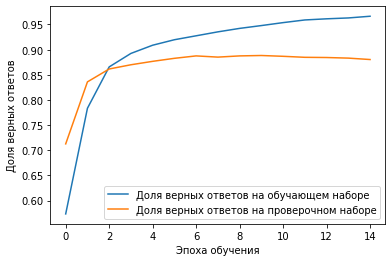

In [91]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [92]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8648


In [93]:
embedding_matrix = model.layers[0].get_weights()[0]
embedding_matrix[:5]

array([[ 0.016005  , -0.02140083, -0.01092433,  0.02664191],
       [ 0.05128385, -0.07283077,  0.03626959,  0.00167863],
       [ 0.04958816, -0.00707554,  0.01555467, -0.02983766],
       [ 0.00556195,  0.00230382,  0.04271441, -0.03550767],
       [-0.07744127,  0.01188505, -0.00349771,  0.01715998]],
      dtype=float32)

In [94]:
word_index_org = imdb.get_word_index()

In [95]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

In [96]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [-0.10201871  0.0777822  -0.12821081  0.17287652]


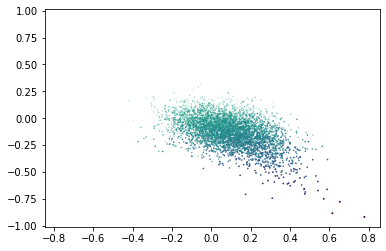

In [102]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1],embedding_matrix[:,2],embedding_matrix[:,3])

In [103]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

In [104]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[-0.14344887,  0.42040852, -0.31949285,  0.39573997],
       [-0.15832263,  0.3407971 , -0.48876083,  0.5020949 ],
       [-0.3631627 ,  0.4287316 , -0.46967047,  0.43350175],
       [-0.10201871,  0.0777822 , -0.12821081,  0.17287652],
       [ 0.13708955, -0.37140006,  0.3722186 , -0.381848  ],
       [ 0.6537899 , -0.77786726,  0.91883725, -0.93387073],
       [ 0.06687962, -0.34755394,  0.4483973 , -0.45306575],
       [ 0.34410152, -0.5594526 ,  0.5923354 , -0.6138675 ],
       [ 0.2357039 , -0.13775481,  0.18890068, -0.15427738]],
      dtype=float32)

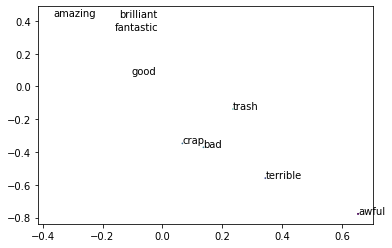

In [108]:
plt.scatter(review_vectors[:,0], review_vectors[:,1],review_vectors[:,2],review_vectors[:,3])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))